# 

# 2

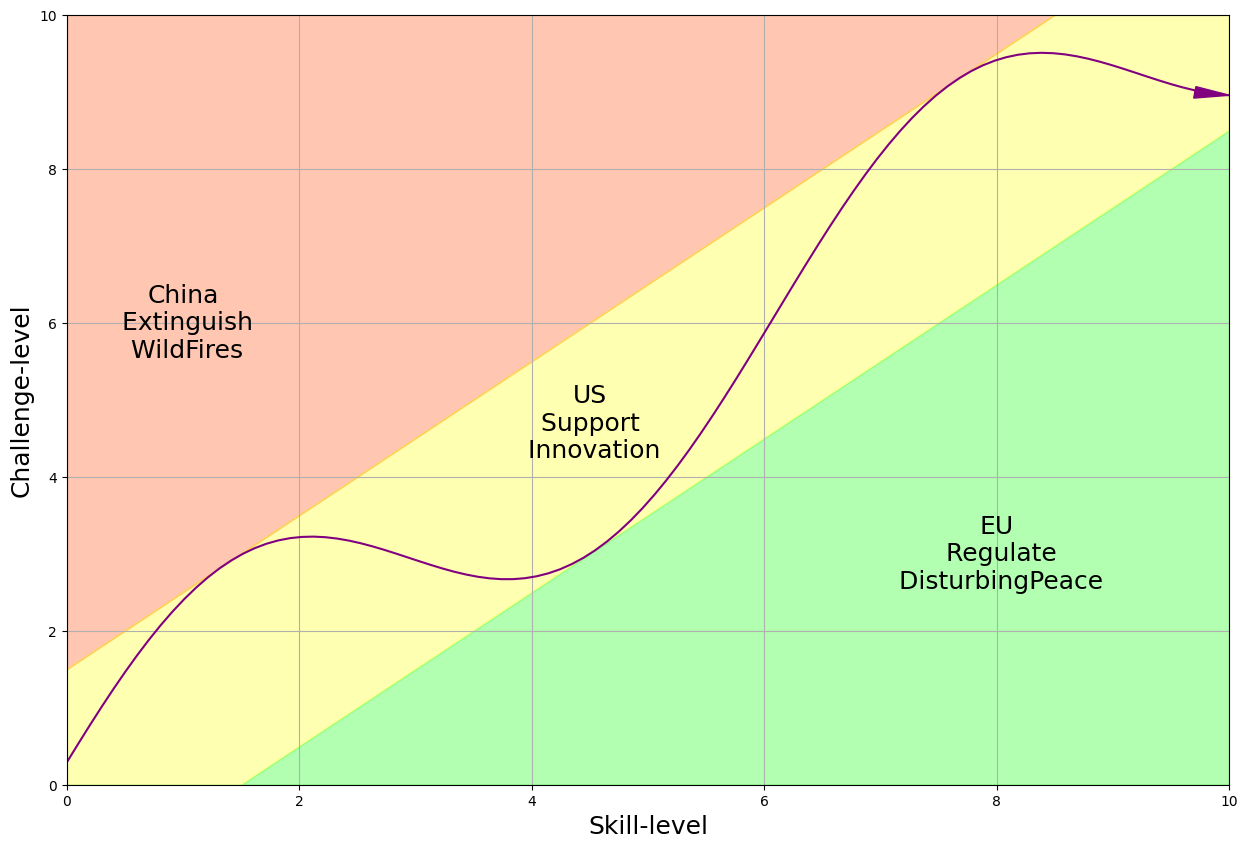

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create data for the skill and challenge levels
skill_levels = np.linspace(0, 10, 100)
challenge_levels = np.linspace(0, 10, 100)

# Define the flow channel boundaries
flow_channel = skill_levels

# Adjust the phase and amplitude of the sinusoid wave
phase = np.pi / 16
amplitude = 1.5
sinusoid = flow_channel + np.sin(skill_levels + phase) * amplitude

# Define the yellow zone boundaries, making it wider
yellow_zone_low = skill_levels - 1.5  # Adjust this value to make the yellow zone wider or narrower
yellow_zone_high = skill_levels + 1.5 # Adjust this value to make the yellow zone wider or narrower

# Plotting
plt.figure(figsize=(15, 10))

# Plot the anxiety and boredom areas
plt.fill_between(skill_levels, yellow_zone_high, 10, color='orangered', alpha=0.3, label='Place/Identification', interpolate=True)
plt.fill_between(skill_levels, 0, yellow_zone_low, color='lime', alpha=0.3, label='Time/Revelation', interpolate=True)
plt.fill_between(skill_levels, yellow_zone_low, yellow_zone_high, color='yellow', alpha=0.3, label='Agent/Evolution', interpolate=True)

# Plot the sinusoid function with the diagonal as its axis
plt.plot(skill_levels, sinusoid, color='purple', linestyle='-')

# Add arrowhead to the sinusoid line
plt.arrow(skill_levels[-2], sinusoid[-2], skill_levels[-1] - skill_levels[-2], sinusoid[-1] - sinusoid[-2],
          color='purple', length_includes_head=True, head_width=0.15, head_length=0.3)

# Set plot labels and title
plt.xlabel('Skill-level', fontsize=18)
plt.ylabel('Challenge-level', rotation='vertical', fontsize=18)

# Set plot limits and grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)

# Set tick labels
tick_labels = ['0', '2', '4', '6', '8', '10']
plt.xticks(np.linspace(0, 10, 6), tick_labels)
plt.yticks(np.linspace(0, 10, 6), tick_labels)

# Add text annotations to label the areas without shaded background
plt.text(1, 6, 'China\n Extinguish\n WildFires', color='black', ha='center', va='center', fontsize=18)
plt.text(4.5, 4.7, 'US\n Support \n Innovation', color='black', ha='center', va='center', fontsize=18)
plt.text(8, 3, 'EU\n Regulate\n DisturbingPeace', color='black', ha='center', va='center', fontsize=18)

# Display the plot
plt.show()

<span style="color:indigo; font-size:43px">China: highest within-country correlation</span><br>
<span style="color:seagreen; font-size:43px;">Europe: intermediate within-block correlation</span><br>
<span style="color:yellow; font-size:43px;">US: lowest within-group correlation</span><br>

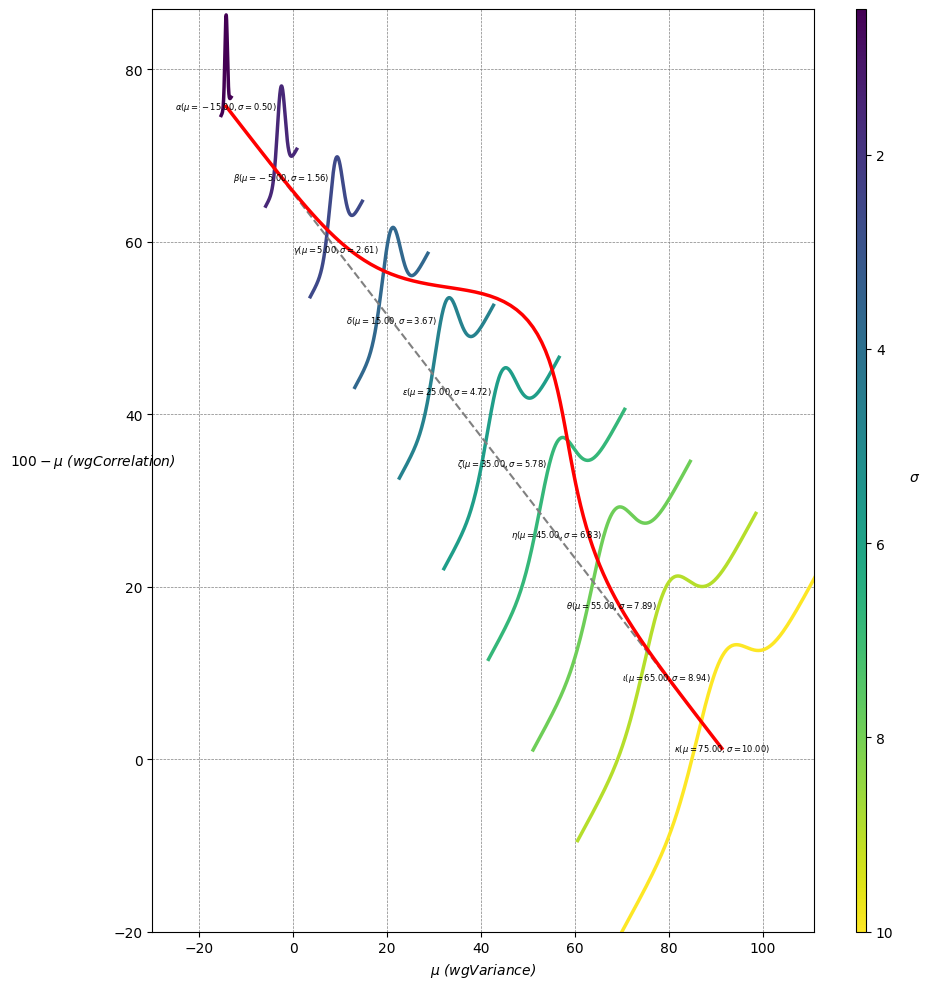

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Define Gaussian Function
def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

# Function to overlay Gaussian on the diagonal based on start and end points
def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

# Create the plot and axis object
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize to better suit your needs


# Create custom Gaussians
intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)
greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ']

# Setup colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create an empty list to hold median points
median_points = []

# Plot custom Gaussians
for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    # Limit Gaussian curve to +/- 3 standard deviations
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    actual_mean = x_center  # Calculating the actual mean point for the label
    ax.text(x_center + custom_means[i] / np.sqrt(2), 
            y_center + custom_means[i] / np.sqrt(2), 
            f"${greek_letters[i]} (\mu={actual_mean:.2f}, \sigma={custom_stds[i]:.2f})$", 
            fontsize=6, ha='center', va='center')
    
    # Add the median point to our list
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

# Convert the list to a numpy array for plotting
median_points = np.array(median_points)

# Plot the dashed gray line through medians
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')

# Find the start and end points of the dashed gray line
start_point = median_points[0, :]
end_point = median_points[-1, :]

# Overlay red Gaussian along the dashed gray line
overlay_gaussian_on_line(ax, start_point, end_point, 17)

# Grid and Legend
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Manually setting the axes limits (if needed)
ax.set_xlim(-30, 111)
ax.set_ylim(-20, 87)

# Create reversed colormap for colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=1, aspect=90)  # Adjust `shrink` and `aspect` here
cbar.set_label(r'$\sigma$', rotation=0, labelpad=15, fontstyle='italic')
cbar.ax.invert_yaxis()


# Add x and y axis titles
ax.set_xlabel(r'$\mu$ (wgVariance)', fontstyle='italic')
ax.set_ylabel(r'$100-\mu$ (wgCorrelation)', rotation=0, fontstyle='italic', labelpad=15)

# Make the layout tight
plt.tight_layout()
plt.show()

In [20]:
# Prepare an empty list to store colors
color_list = []

# Get the colors from the colormap
for std_dev in custom_stds:
    color = cmap(norm(std_dev))
    color_list.append(color)

# Create a dictionary to map Greek letters to colors
greek_to_color = {greek: color for greek, color in zip(greek_letters, color_list)}

print("Colors corresponding to Greek letters:")
for letter, color in greek_to_color.items():
    print(f"{letter}: {color}")


Colors corresponding to Greek letters:
α: (0.267004, 0.004874, 0.329415, 1.0)
β: (0.281412, 0.155834, 0.469201, 1.0)
γ: (0.244972, 0.287675, 0.53726, 1.0)
δ: (0.190631, 0.407061, 0.556089, 1.0)
ε: (0.147607, 0.511733, 0.557049, 1.0)
ζ: (0.119699, 0.61849, 0.536347, 1.0)
η: (0.20803, 0.718701, 0.472873, 1.0)
θ: (0.430983, 0.808473, 0.346476, 1.0)
ι: (0.709898, 0.868751, 0.169257, 1.0)
κ: (0.993248, 0.906157, 0.143936, 1.0)


In [18]:
# !pip install webcolors

import webcolors

def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Your RGBA tuple scaled to 0-255
rgba = (0.267004 * 255, 0.511733 * 255, 0.329415 * 255, 1.0)
# Ignoring the alpha channel for this
rgb = tuple(map(int, rgba[:3]))

closest_named_color = closest_color(rgb)
print(f"The closest named color is {closest_named_color}.")


The closest named color is seagreen.






















































<Details>
<Summary></Summary>

Announcing Google Cloud Next ’24<br>
April 9-11, 2024<br>
<span style="color:grey;">Mandalay Bay, Convention Center, Las Vegas, NV</span><br>
</Details>